## House Price Prediction

Importing Standard Libraries

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
from IPython import display

Importing the data set

In [150]:
df=pd.read_csv('houseprice.csv')

Basic audits of the dataset

In [151]:
#looking into the first 5 values of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [152]:
# detailed info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Checking for inconsistent columns

In [153]:
#Dropping Id column as this will not make any sense in our prediction
df.drop(['Id'],axis=1,inplace=True)

Finding and handling the missing values

In [154]:
#gives total number of null values in each and every columns
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [155]:
#Droping the columns that has more number of values missed
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

Imputing Missing values

In [156]:
#Imputing the misseing values using median for numeric variables and mode for categorical variables
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0],inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0],inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0],inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0],inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

In [157]:
df.isna().sum()

#now we can see all the null values are filled and the sum of null values in each variable is zero

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

#### Univariate analysis

In [158]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Bi-variate Analysis for continues variables

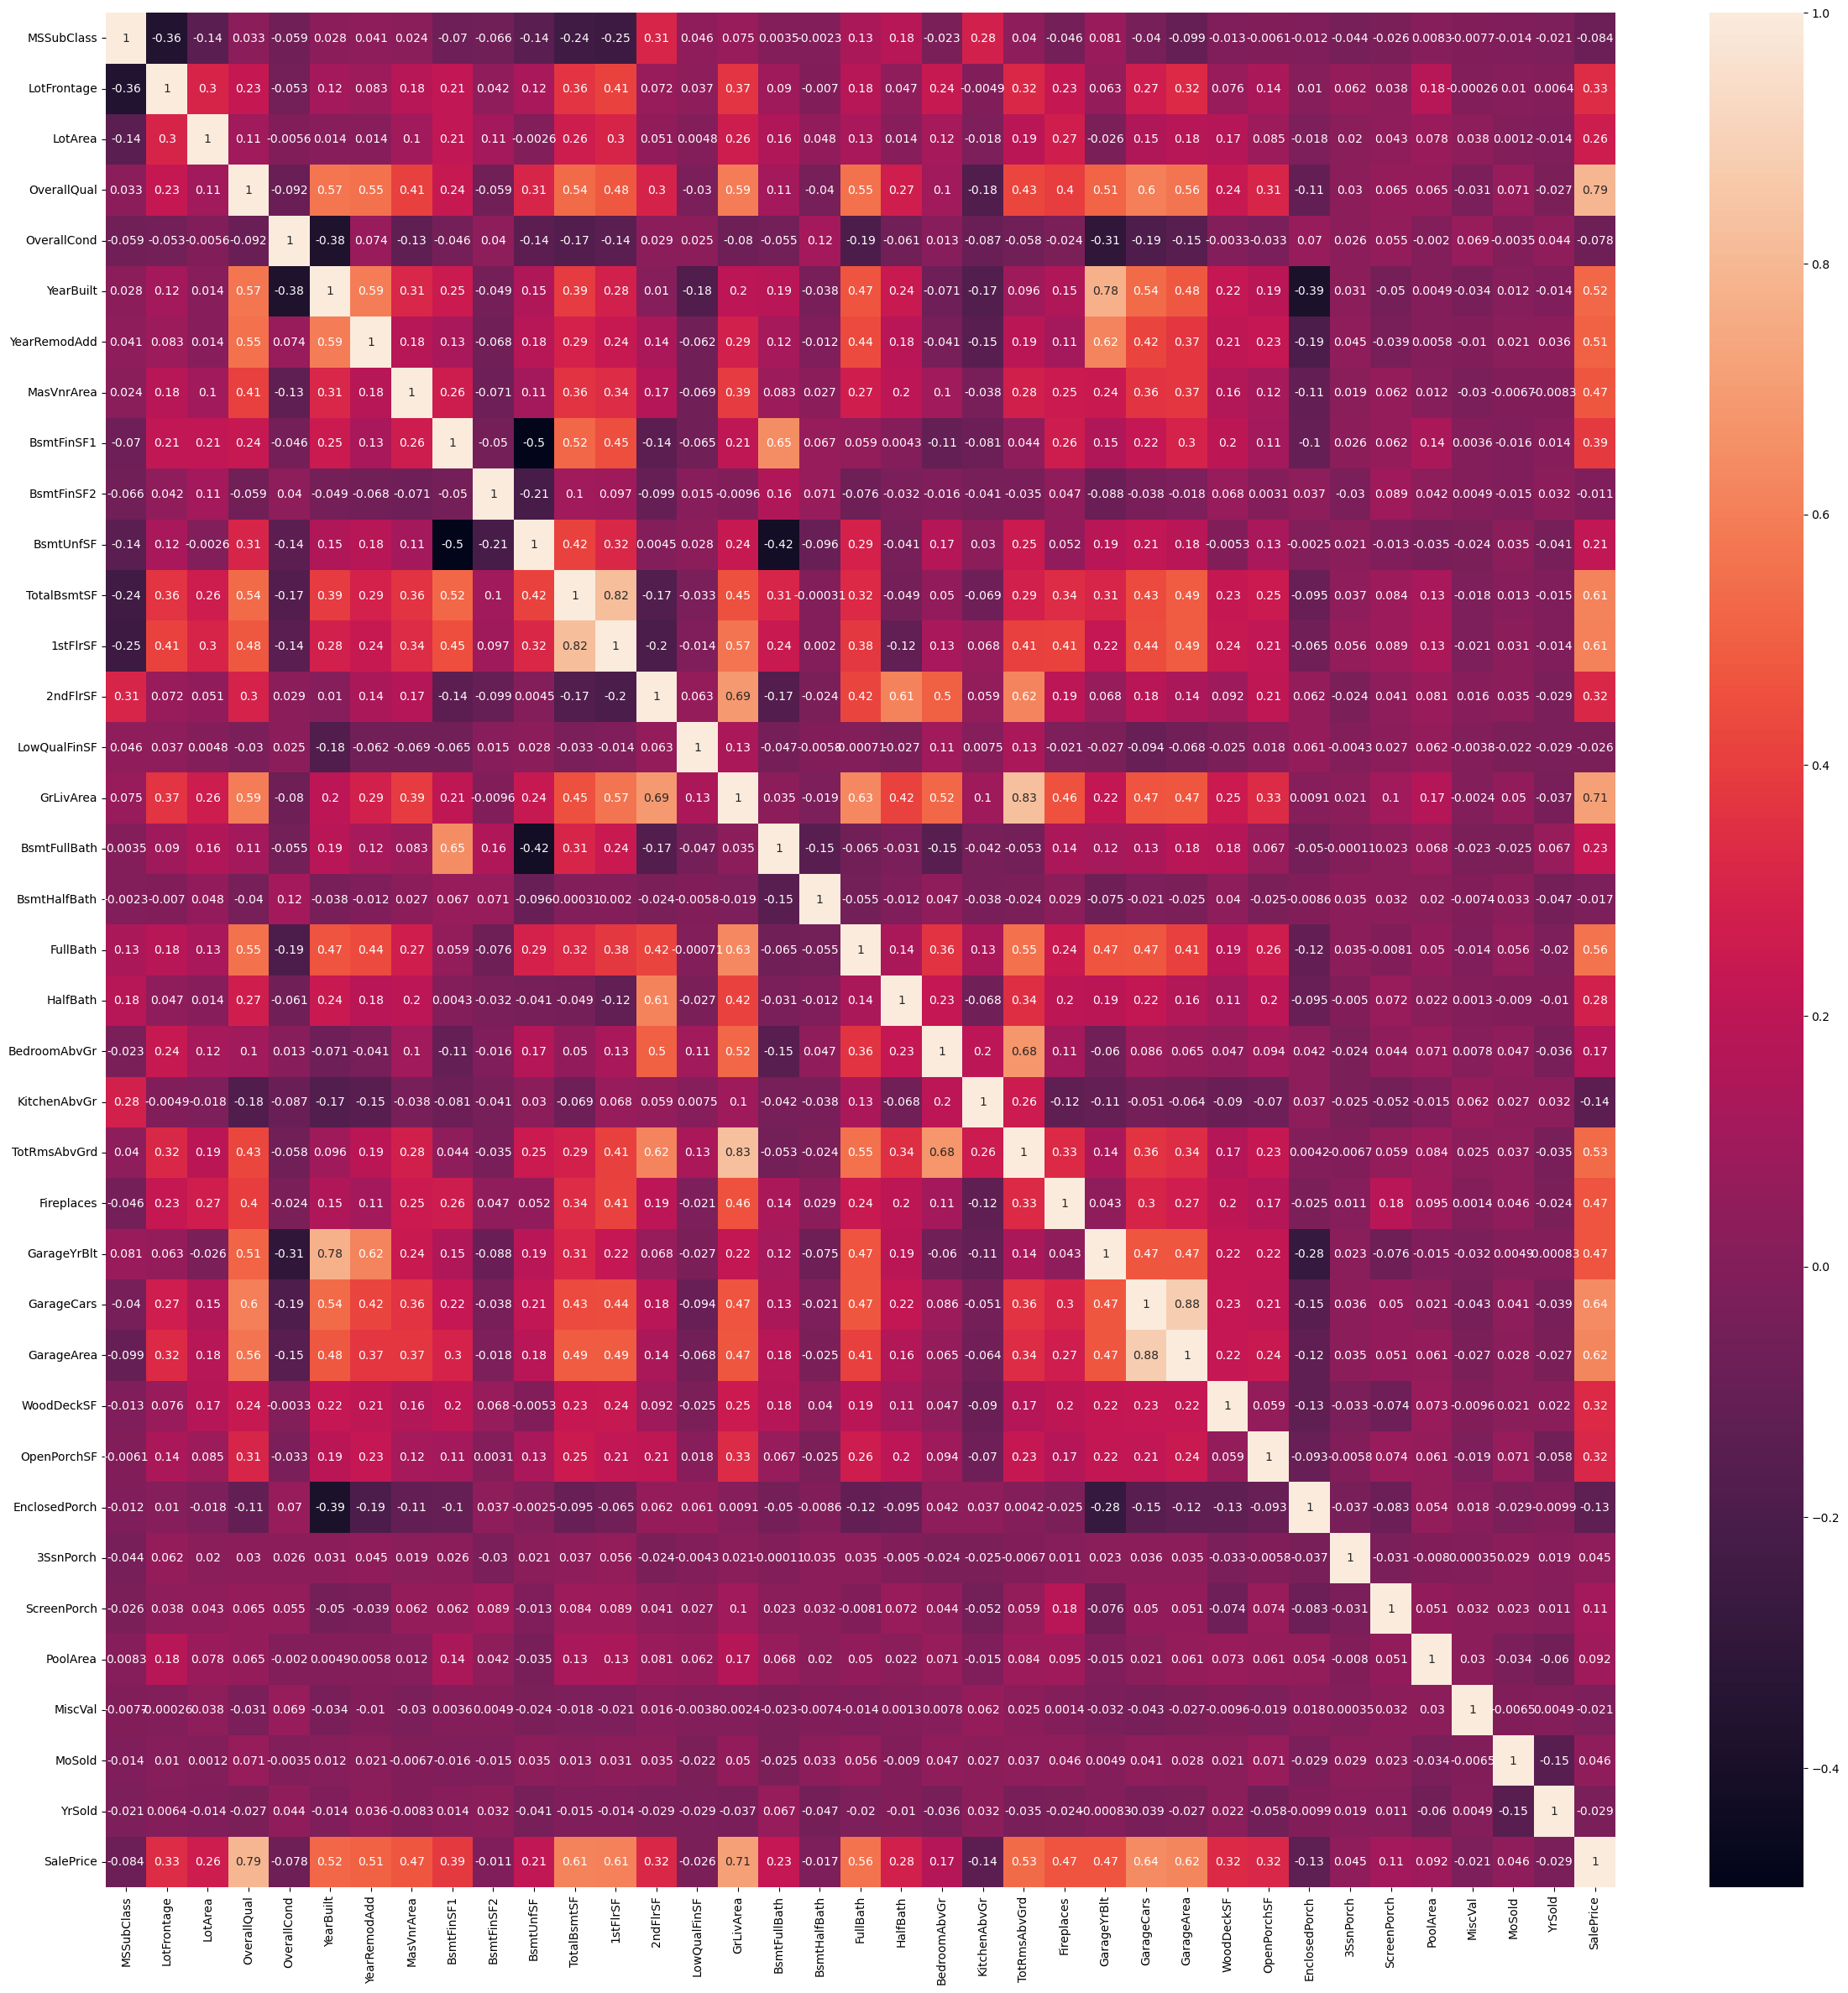

In [162]:
plt.figure(figsize=(29,29))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Checking for multicolinearity using Variance_inflation Factor 

In [96]:
#Selecting only numerical colmns excluding the target variables as this step may drop the target variable
df_num=df.drop(['SalePrice'],axis=1).select_dtypes(include=[np.number])

In [97]:
#first fing the vif for all the columns and storing it as a new data set
vif_data = pd.DataFrame()
vif_data["feature"] = df_num.columns
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
vif_sorted=vif_data.sort_values(by='VIF')

In [99]:
print(round(vif_sorted),2)

          feature      VIF
33        MiscVal      1.0
30      3SsnPorch      1.0
32       PoolArea      1.0
31    ScreenPorch      1.0
17   BsmtHalfBath      1.0
29  EnclosedPorch      1.0
28    OpenPorchSF      2.0
7      MasVnrArea      2.0
27     WoodDeckSF      2.0
2         LotArea      3.0
23     Fireplaces      3.0
19       HalfBath      3.0
16   BsmtFullBath      4.0
0      MSSubClass      5.0
34         MoSold      7.0
1     LotFrontage     17.0
18       FullBath     27.0
20   BedroomAbvGr     31.0
26     GarageArea     32.0
25     GarageCars     37.0
21   KitchenAbvGr     38.0
4     OverallCond     42.0
3     OverallQual     67.0
22   TotRmsAbvGrd     83.0
5       YearBuilt  21284.0
6    YearRemodAdd  22415.0
24    GarageYrBlt  22517.0
35         YrSold  24050.0
8      BsmtFinSF1      inf
13       2ndFlrSF      inf
10      BsmtUnfSF      inf
11    TotalBsmtSF      inf
12       1stFlrSF      inf
15      GrLivArea      inf
9      BsmtFinSF2      inf
14   LowQualFinSF      inf 2

In [100]:
#making a list with variables those with high VIF
to_drop=[]
for i in vif_sorted.values:
    if i[1]>17.0:
        to_drop.append(i[0])

In [101]:
to_drop

['LotFrontage',
 'FullBath',
 'BedroomAbvGr',
 'GarageArea',
 'GarageCars',
 'KitchenAbvGr',
 'OverallCond',
 'OverallQual',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'YrSold',
 'BsmtFinSF1',
 '2ndFlrSF',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFinSF2',
 'LowQualFinSF']

In [102]:
#drops the columns those have multicolinearity
for i in to_drop:
    df.drop([i],axis=1,inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  RoofStyle      1460 non-null   object 
 15  RoofMatl       1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

### Outlier Analysis

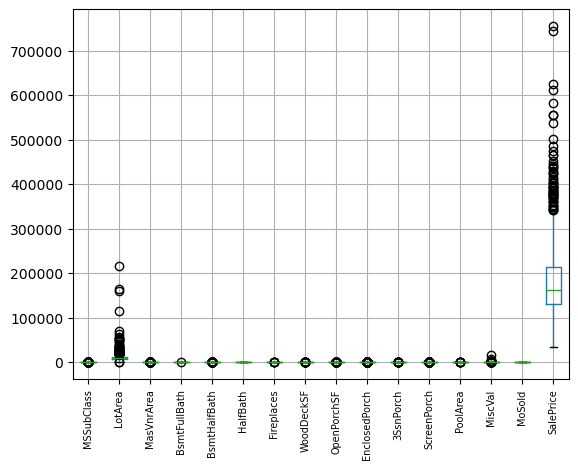

In [104]:
df.boxplot()
plt.xticks(rotation=90,fontsize=7)
plt.show()

In [105]:
# Checking for the skewness of variables
df.skew()

MSSubClass        1.407657
LotArea          12.207688
MasVnrArea        2.677616
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
HalfBath          0.675897
Fireplaces        0.649565
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
SalePrice         1.882876
dtype: float64

In [107]:
#dropping the columns with more skewness
for i in df.select_dtypes(include=[np.number]):
    if df[i].skew()>2.0:
        df.drop([i],axis=1,inplace=True)

### Removal of Outliers

In [108]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [109]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [110]:
df.shape

(1268, 46)

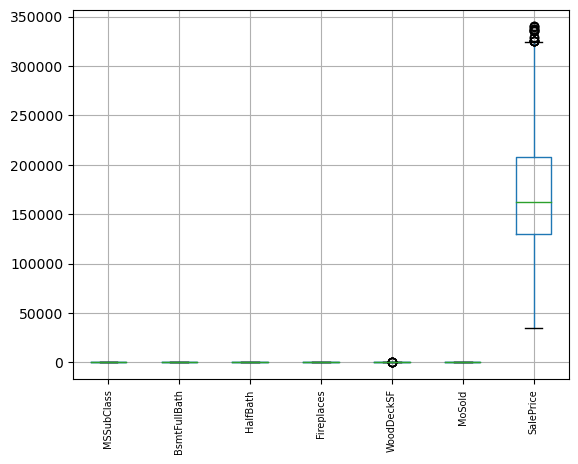

In [111]:
# now we can notice that the outliers has reduced to a large extent
df.boxplot()
plt.xticks(rotation='vertical',fontsize=7)
plt.show()

Encoding the categorical variables

In [112]:
obj_cols=df.select_dtypes(object)

In [113]:
# As Linear model doesn't allows object variables we are encoding those using LabelEncoder
le=LabelEncoder()
for col in obj_cols:
    df[col]=le.fit_transform(df[col])

In [114]:
#Ensuring all the variables are encoded
df.head(10)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,HalfBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,SaleType,SaleCondition,SalePrice
0,60,3,1,3,3,0,4,0,3,2,1,0,5,1,0,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,1,1,2,6,0,2,1,1,4,4,2,0,2,8,4,208500
1,20,3,1,3,3,0,2,0,22,1,1,0,2,1,0,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,0,0,3,6,1,4,1,1,4,4,2,298,5,8,4,181500
2,60,3,1,0,3,0,4,0,3,2,1,0,5,1,0,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,1,1,2,6,1,4,1,1,4,4,2,0,9,8,4,223500
3,70,3,1,0,3,0,0,0,4,2,1,0,5,1,0,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,1,0,2,6,1,2,5,2,4,4,2,0,2,8,0,140000
4,60,3,1,0,3,0,2,0,13,2,1,0,5,1,0,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,1,1,2,6,1,4,1,1,4,4,2,192,12,8,4,250000
5,50,3,1,0,3,0,4,0,9,2,1,0,0,1,0,12,13,2,3,4,5,2,3,3,2,5,1,0,1,4,1,1,3,6,0,2,1,2,4,4,2,40,10,8,4,143000
6,20,3,1,3,3,0,4,0,19,2,1,0,2,1,0,12,13,3,2,4,2,0,3,0,2,5,1,0,1,4,1,0,2,6,1,2,1,1,4,4,2,255,8,8,4,307000
7,60,3,1,0,3,0,0,0,12,4,1,0,5,1,0,6,6,3,3,4,1,2,3,2,0,1,1,0,1,4,1,1,3,6,2,4,1,1,4,4,2,235,11,8,4,200000
8,50,4,1,3,3,0,4,0,15,0,1,0,0,1,0,3,15,2,3,4,0,3,3,3,5,5,1,2,1,1,0,0,3,2,2,4,5,2,1,4,2,90,4,8,0,129900
10,20,3,1,3,3,0,4,0,17,2,1,0,2,3,0,6,6,2,3,4,1,3,3,3,4,5,1,0,1,4,1,0,3,6,0,2,5,2,4,4,2,0,2,8,4,129500


In [115]:
df.dtypes

MSSubClass       int64
MSZoning         int32
Street           int32
LotShape         int32
LandContour      int32
Utilities        int32
LotConfig        int32
LandSlope        int32
Neighborhood     int32
Condition1       int32
Condition2       int32
BldgType         int32
HouseStyle       int32
RoofStyle        int32
RoofMatl         int32
Exterior1st      int32
Exterior2nd      int32
MasVnrType       int32
ExterQual        int32
ExterCond        int32
Foundation       int32
BsmtQual         int32
BsmtCond         int32
BsmtExposure     int32
BsmtFinType1     int32
BsmtFinType2     int32
Heating          int32
HeatingQC        int32
CentralAir       int32
Electrical       int32
BsmtFullBath     int64
HalfBath         int64
KitchenQual      int32
Functional       int32
Fireplaces       int64
FireplaceQu      int32
GarageType       int32
GarageFinish     int32
GarageQual       int32
GarageCond       int32
PavedDrive       int32
WoodDeckSF       int64
MoSold           int64
SaleType   

#### Features and target variable splitting

In [116]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

#### Train and Test data Splitting

In [117]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=123,test_size=0.2)

In [118]:
# Checking the shape of the data
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1014, 45)
(254, 45)
(1014,)
(254,)


## Linear regression Modelling

In [137]:
#Fitting the model with the xtrain and ytrain
LR=LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [139]:
xtrain.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,HalfBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,SaleType,SaleCondition
1380,30,3,1,3,3,0,4,0,5,2,1,0,2,1,0,11,12,2,3,1,0,3,0,3,4,5,1,4,0,1,1,0,3,6,0,2,5,2,4,1,2,0,6,8,4
1394,120,3,1,3,3,0,4,0,0,2,1,4,2,3,0,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,1,0,2,6,1,2,1,0,4,4,2,161,10,6,5
1398,50,3,1,3,3,0,4,0,10,2,1,0,0,1,0,12,14,2,3,4,1,3,3,3,4,1,1,2,1,0,1,1,3,2,0,2,1,2,4,4,2,0,5,8,4
279,60,3,1,3,3,0,4,0,2,2,1,0,5,3,0,9,10,1,3,4,1,2,3,3,1,5,1,0,1,4,0,1,3,6,1,4,1,0,4,4,2,288,3,8,4
712,120,3,1,0,1,0,4,0,20,2,1,4,2,1,0,6,6,2,2,4,2,2,3,2,2,5,1,2,1,4,1,0,2,6,1,2,1,0,4,4,2,168,10,8,4


#### Predicting for the new data

In [143]:
LR.predict([[134,4,2,1,3,1,3,1,8,2,3,3,6,2,1,10,3,1,3,3,1,2,1,3,4,0,3,0,3,0,1,1,1,5,0,3,4,1,3,5,1,278,12,7,3]])

array([230974.90628946])